# **Proyek Analisis Data: Air Quality Dataset**
- **Nama:** Daniel Ridho Abadi
- **Email:** danielgagg21@gmail.com
- **ID Dicoding:** danielridho

## Menentukan Pertanyaan Bisnis

- Bagaimana tren tahunan tingkat rata-rata CO di seluruh lokasi pengukuran dari 2013 hingga 2017 dan apakah ada pola umum  terlihat?
- Apakah ada korelasi antara suhu dan tingkat O3 di seluruh lokasi pengukuran selama periode pengamatan?
- Bagaimana distribusi tingkat NO2 di berbagai stasiun pengukuran di Beijing berdasarkan musim, dan stasiun pengukuran mana yang menunjukkan perbedaan tingkat NO2 terkecil antar musim?

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

1. Aotizhongxin Table

In [54]:
Aotizhongxin_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


2. Changping Table

In [55]:
Changping_df = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


3. Dingling Table

In [56]:
Dingling_df = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


4. Dongsi Table

In [57]:
Dongsi_df = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


5. Guanyun Table

In [58]:
Guanyuan_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
Guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


6. Gucheng Table

In [59]:
Gucheng_df = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


7. Huairou Table

In [60]:
Huairou_df = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
Huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


8. Nongzhanguan Table

In [61]:
Nongzhanguan_df = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


9. Shunyi Table

In [62]:
Shunyi_df = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
Shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


10. Tiantan Table

In [63]:
Tiantan_df = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
Tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


11. Wanliu Table

In [64]:
Wanliu_df = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


12. Wanshouxigong Table

In [65]:
Wanshouxigong_df = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
Wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**

Terdapat 12 tabel yang menunjukkan tingkat kualitas udara berbagai kota di China dengan kriteria sebagai berikut: 
- **No:** Nomor urut pengamatan yang digunakan sebagai indeks data (dihapus karena tidak dibutuhkan).
- **year:** Tahun pengambilan data kualitas udara.
- **month:** Bulan pengambilan data kualitas udara.
- **day:** Tanggal pengambilan data kualitas udara.
- **hour:** Jam pengambilan data kualitas udara, menunjukkan waktu spesifik dalam satu hari.
- **PM2.5:** Konsentrasi partikel udara halus berukuran 2.5 mikron atau lebih kecil, yang dapat masuk ke paru-paru dan mempengaruhi kesehatan, diukur dalam µg/m³.
- **PM10:** Konsentrasi partikel udara yang berukuran hingga 10 mikron, yang juga berdampak pada kesehatan pernapasan, diukur dalam µg/m³.
- **SO2:** Konsentrasi sulfur dioksida di udara, polutan gas yang dapat menyebabkan iritasi saluran pernapasan dan hujan asam, diukur dalam µg/m³.
- **NO2:** Konsentrasi nitrogen dioksida di udara, yang berasal dari pembakaran bahan bakar fosil dan dapat merusak saluran pernapasan, diukur dalam µg/m³.
- **CO:** Konsentrasi karbon monoksida di udara, gas beracun yang berasal dari pembakaran tidak sempurna, diukur dalam µg/m³.
- **O3:** Konsentrasi ozon di permukaan tanah, polutan yang dapat menyebabkan masalah pernapasan jika berada dalam jumlah berlebih, diukur dalam µg/m³.
- **TEMP:** Suhu udara pada saat pengambilan data, diukur dalam derajat Celsius.
- **PRES:** Tekanan udara atmosfer pada saat pengambilan data, diukur dalam hektopascal (hPa).
- **DEWP:** Suhu titik embun, yaitu suhu di mana uap air mulai mengembun menjadi air, diukur dalam derajat Celsius.
- **RAIN:** Jumlah curah hujan pada saat pengambilan data, diukur dalam milimeter (mm).
- **wd:** Arah angin yang menunjukkan dari mana angin bertiup, biasanya dalam derajat atau arah mata angin.
- **WSPM:** Kecepatan angin pada saat pengambilan data, diukur dalam meter per detik (m/s).
- **station:** Nama stasiun pengamatan di mana data kualitas udara diambil.

### Assessing Data

Mencari Missing Value

In [66]:
print('Dataframe Aotizhongxin:')
print(Aotizhongxin_df.isna().sum())

Dataframe Aotizhongxin:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [67]:
print('Dataframe Changping:')
print(Changping_df.isna().sum())

Dataframe Changping:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [68]:
print('Dataframe Dingling:')
print(Dingling_df.isna().sum())

Dataframe Dingling:
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [69]:
print('Dataframe Dongsi:')
print(Dongsi_df.isna().sum())

Dataframe Dongsi:
No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [70]:
print('Dataframe Guanyuan:')
print(Guanyuan_df.isna().sum())

Dataframe Guanyuan:
No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [71]:
print('Dataframe Gucheng:')
print(Gucheng_df.isna().sum())

Dataframe Gucheng:
No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64


In [72]:
print('Dataframe Huairou:')
print(Huairou_df.isna().sum())

Dataframe Huairou:
No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64


In [73]:
print('Dataframe Nongzhanguan:')
print(Nongzhanguan_df.isna().sum())

Dataframe Nongzhanguan:
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [74]:
print('Dataframe Shunyi:')
print(Shunyi_df.isna().sum())

Dataframe Shunyi:
No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64


In [75]:
print('Dataframe Tiantan:')
print(Tiantan_df.isna().sum())

Dataframe Tiantan:
No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [76]:
print('Dataframe Wanliu:')
print(Wanliu_df.isna().sum())

Dataframe Wanliu:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


In [77]:
print('Dataframe Wanshouxigong:')
print(Wanshouxigong_df.isna().sum())

Dataframe Wanshouxigong:
No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64


**Insight:**
- Masih terdapat banyak sekali nilai kosong pada setiap tabel yang perlu di lakukan proses (PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.)

Cek Data Duplikat

In [78]:
print('Jumlah Data Duplikat:')
print('Tabel Aotizhongxin:', Aotizhongxin_df.duplicated().sum())
print('Tabel Changping:', Changping_df.duplicated().sum())
print('Tabel Dingling:', Dingling_df.duplicated().sum())
print('Tabel Dongsi:', Dongsi_df.duplicated().sum())
print('Tabel Guanyuan:', Guanyuan_df.duplicated().sum())
print('Tabel Gucheng:', Gucheng_df.duplicated().sum())
print('Tabel Huairou:', Huairou_df.duplicated().sum())
print('Tabel Nongzhanguan:', Nongzhanguan_df.duplicated().sum())
print('Tabel Shunyi:', Shunyi_df.duplicated().sum())
print('Tabel Tiantan:', Tiantan_df.duplicated().sum())
print('Tabel Wanliu:', Wanliu_df.duplicated().sum())
print('Tabel Wanshouxigong:', Wanshouxigong_df.duplicated().sum())

Jumlah Data Duplikat:
Tabel Aotizhongxin: 0
Tabel Changping: 0
Tabel Dingling: 0
Tabel Dongsi: 0
Tabel Guanyuan: 0
Tabel Gucheng: 0
Tabel Huairou: 0
Tabel Nongzhanguan: 0
Tabel Shunyi: 0
Tabel Tiantan: 0
Tabel Wanliu: 0
Tabel Wanshouxigong: 0


**Insight:**
- Tidak terdapat data yang bersifat duplikat pada setiap tabel data

Cek Oulier pada Data

In [79]:
def outliersIQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

outliersIQR_Aotizhongxin = outliersIQR(Aotizhongxin_df.select_dtypes(include=[np.number]))
outliersIQR_Changping = outliersIQR(Changping_df.select_dtypes(include=[np.number]))
outliersIQR_Dingling = outliersIQR(Dingling_df.select_dtypes(include=[np.number]))
outliersIQR_Dongsi = outliersIQR(Dongsi_df.select_dtypes(include=[np.number]))
outliersIQR_Guanyuan = outliersIQR(Guanyuan_df.select_dtypes(include=[np.number]))
outliersIQR_Gucheng = outliersIQR(Gucheng_df.select_dtypes(include=[np.number]))
outliersIQR_Huairou = outliersIQR(Huairou_df.select_dtypes(include=[np.number]))
outliersIQRNongzhanguan = outliersIQR(Nongzhanguan_df.select_dtypes(include=[np.number]))
outliersIQR_Shunyi = outliersIQR(Shunyi_df.select_dtypes(include=[np.number]))
outliersIQR_Tiantan = outliersIQR(Tiantan_df.select_dtypes(include=[np.number]))
outliersIQR_Wanliu = outliersIQR(Wanliu_df.select_dtypes(include=[np.number]))
outliersIQR_Wanshouxigong = outliersIQR(Wanshouxigong_df.select_dtypes(include=[np.number]))


print("Outliers in Aotizhongxin (IQR):\n", Aotizhongxin_df[outliersIQR_Aotizhongxin])
print("Outliers in Changping (IQR):\n", Changping_df[outliersIQR_Changping])
print("Outliers in Dingling (IQR):\n", Dingling_df[outliersIQR_Dingling])
print("Outliers in Dongsi (IQR):\n", Dongsi_df[outliersIQR_Dongsi])
print("Outliers in Guanyuan (IQR):\n", Guanyuan_df[outliersIQR_Guanyuan])
print("Outliers in Gucheng (IQR):\n", Gucheng_df[outliersIQR_Gucheng])
print("Outliers in Huairou (IQR):\n", Huairou_df[outliersIQR_Huairou])
print("Outliers in Nongzhanguan (IQR):\n", Nongzhanguan_df[outliersIQRNongzhanguan])
print("Outliers in Shunyi (IQR):\n", Shunyi_df[outliersIQR_Shunyi])
print("Outliers in Tiantan (IQR):\n", Tiantan_df[outliersIQR_Tiantan])
print("Outliers in Wanliu (IQR):\n", Wanliu_df[outliersIQR_Wanliu])
print("Outliers in Wanshouxigong (IQR):\n", Wanshouxigong_df[outliersIQR_Wanshouxigong])

Outliers in Aotizhongxin (IQR):
           No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0  4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0  5.0  10.0  300.0  73.0   
12        13  2013      3    1    12    3.0   6.0  7.0  13.0  300.0  74.0   
13        14  2013      3    1    13    3.0   6.0  7.0  12.0  400.0  76.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
34891  34892  2017      2   21    19   31.0  41.0  2.0  48.0  600.0  48.0   
34892  34893  2017      2   21    20   47.0  52.0  2.0  50.0  800.0  38.0   
34893  34894  2017      2   21    21   67.0  67.0  2.0  57.0  100.0  21.0   
34894  34895  2017      2   21    22   60.0  60.0  2.0  47.0  900.0  32.0   
34895  34896  2017      2   21    23   62.0  62.0  2.0  48.0  100.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM

**Insight**

- Hasil Outliers pada setiap tabel. Terdapat outlier pada PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM

### Cleaning Data

Memisahkan data numerik dan non-numerik pada setiap tabel

In [80]:
# Aotizhongxin
numerik_Aotizhongxin = Aotizhongxin_df.select_dtypes(include=[np.number])
non_numerik_Aotizhongxin = Aotizhongxin_df.select_dtypes(exclude=[np.number])

# Changping
numerik_Changping = Changping_df.select_dtypes(include=[np.number])
non_numerik_Changping = Changping_df.select_dtypes(exclude=[np.number])

# Dingling
numerik_Dingling = Dingling_df.select_dtypes(include=[np.number])
non_numerik_Dingling = Dingling_df.select_dtypes(exclude=[np.number])

# Dongsi
numerik_Dongsi = Dongsi_df.select_dtypes(include=[np.number])
non_numerik_Dongsi = Dongsi_df.select_dtypes(exclude=[np.number])

# Guanyuan
numerik_Guanyuan = Guanyuan_df.select_dtypes(include=[np.number])
non_numerik_Guanyuan = Guanyuan_df.select_dtypes(exclude=[np.number])

# Gucheng
numerik_Gucheng = Gucheng_df.select_dtypes(include=[np.number])
non_numerik_Gucheng = Gucheng_df.select_dtypes(exclude=[np.number])

# Huairou
numerik_Huairou = Huairou_df.select_dtypes(include=[np.number])
non_numerik_Huairou = Huairou_df.select_dtypes(exclude=[np.number])

# Nongzhanguan
numerik_Nongzhanguan = Nongzhanguan_df.select_dtypes(include=[np.number])
non_numerik_Nongzhanguan = Nongzhanguan_df.select_dtypes(exclude=[np.number])

# Shunyi
numerik_Shunyi = Shunyi_df.select_dtypes(include=[np.number])
non_numerik_Shunyi = Shunyi_df.select_dtypes(exclude=[np.number])

# Tiantan
numerik_Tiantan = Tiantan_df.select_dtypes(include=[np.number])
non_numerik_Tiantan = Tiantan_df.select_dtypes(exclude=[np.number])

# Wanliu
numerik_Wanliu = Wanliu_df.select_dtypes(include=[np.number])
non_numerik_Wanliu = Wanliu_df.select_dtypes(exclude=[np.number])

# Wanshouxigong
numerik_Wanshouxigong = Wanshouxigong_df.select_dtypes(include=[np.number])
non_numerik_Wanshouxigong = Wanshouxigong_df.select_dtypes(exclude=[np.number])

Setelah sudah dipisah, imputasi terlebih dahulu kolom numerik menjadi mean pada setiap tabel

In [81]:
# Aotizhongxin
numerik_Aotizhongxin.fillna(numerik_Aotizhongxin.mean(), inplace=True)

# Changping
numerik_Changping.fillna(numerik_Changping.mean(), inplace=True)

# Dingling
numerik_Dingling.fillna(numerik_Dingling.mean(), inplace=True)

# Dongsi
numerik_Dongsi.fillna(numerik_Dongsi.mean(), inplace=True)

# Guanyuan
numerik_Guanyuan.fillna(numerik_Guanyuan.mean(), inplace=True)

# Gucheng
numerik_Gucheng.fillna(numerik_Gucheng.mean(), inplace=True)

# Huairou
numerik_Huairou.fillna(numerik_Huairou.mean(), inplace=True)

# Nongzhanguan
numerik_Nongzhanguan.fillna(numerik_Nongzhanguan.mean(), inplace=True)

# Shunyi
numerik_Shunyi.fillna(numerik_Shunyi.mean(), inplace=True)

# Tiantan
numerik_Tiantan.fillna(numerik_Tiantan.mean(), inplace=True)

# Wanliu
numerik_Wanliu.fillna(numerik_Wanliu.mean(), inplace=True)

# Wanshouxigong
numerik_Wanshouxigong.fillna(numerik_Wanshouxigong.mean(), inplace=True)

Selanjutnya, imputasi kolom non-numerik dengan nilai modus yang pertama

In [82]:
# Aotizhongxin
non_numerik_Aotizhongxin.fillna(non_numerik_Aotizhongxin.mode().iloc[0], inplace=True)

# Changping
non_numerik_Changping.fillna(non_numerik_Changping.mode().iloc[0], inplace=True)

# Dingling
non_numerik_Dingling.fillna(non_numerik_Dingling.mode().iloc[0], inplace=True)

# Dongsi
non_numerik_Dongsi.fillna(non_numerik_Dongsi.mode().iloc[0], inplace=True)

# Guanyuan
non_numerik_Guanyuan.fillna(non_numerik_Guanyuan.mode().iloc[0], inplace=True)

# Gucheng
non_numerik_Gucheng.fillna(non_numerik_Gucheng.mode().iloc[0], inplace=True)

# Huairou
non_numerik_Huairou.fillna(non_numerik_Huairou.mode().iloc[0], inplace=True)

# Nongzhanguan
non_numerik_Nongzhanguan.fillna(non_numerik_Nongzhanguan.mode().iloc[0], inplace=True)

# Shunyi
non_numerik_Shunyi.fillna(non_numerik_Shunyi.mode().iloc[0], inplace=True)

# Tiantan
non_numerik_Tiantan.fillna(non_numerik_Tiantan.mode().iloc[0], inplace=True)

# Wanliu
non_numerik_Wanliu.fillna(non_numerik_Wanliu.mode().iloc[0], inplace=True)

# Wanshouxigong
non_numerik_Wanshouxigong.fillna(non_numerik_Wanshouxigong.mode().iloc[0], inplace=True)

Gabungkan kolom numerik dan non-numerik menjadi satu lagi

In [83]:
Aotizhongxin_merged = pd.concat([numerik_Aotizhongxin, non_numerik_Aotizhongxin], axis=1)
Changping_merged = pd.concat([numerik_Changping, non_numerik_Changping], axis=1)
Dingling_merged = pd.concat([numerik_Dingling, non_numerik_Dingling], axis=1)
Dongsi_merged = pd.concat([numerik_Dongsi, non_numerik_Dongsi], axis=1)
Guanyuan_merged = pd.concat([numerik_Guanyuan, non_numerik_Guanyuan], axis=1)
Gucheng_merged = pd.concat([numerik_Gucheng, non_numerik_Gucheng], axis=1)
Huairou_merged = pd.concat([numerik_Huairou, non_numerik_Huairou], axis=1)
Nongzhanguan_merged = pd.concat([numerik_Nongzhanguan, non_numerik_Nongzhanguan], axis=1)
Shunyi_merged = pd.concat([numerik_Shunyi, non_numerik_Shunyi], axis=1)
Tiantan_merged = pd.concat([numerik_Tiantan, non_numerik_Tiantan], axis=1)
Wanliu_merged = pd.concat([numerik_Wanliu, non_numerik_Wanliu], axis=1)
Wanshouxigong_merged = pd.concat([numerik_Wanshouxigong, non_numerik_Wanshouxigong], axis=1)

Cek sekali lagi apakah ada nilai yang menghilang setelah data di gabung menjadi satu

In [84]:
print('Nilai hilang pada Tabel Aotizhongxin:', Aotizhongxin_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Changping:', Changping_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Dingling:', Dingling_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Dongsi:', Dongsi_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Guanyuan:', Guanyuan_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Gucheng:', Gucheng_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Huairou:', Huairou_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Nongzhanguan:', Nongzhanguan_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Shunyi:', Shunyi_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Tiantan:', Tiantan_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Wanliu:', Wanliu_merged.isnull().sum().sum())
print('Nilai hilang pada Tabel Wanshouxigong:', Wanshouxigong_merged.isnull().sum().sum())

Nilai hilang pada Tabel Aotizhongxin: 0
Nilai hilang pada Tabel Changping: 0
Nilai hilang pada Tabel Dingling: 0
Nilai hilang pada Tabel Dongsi: 0
Nilai hilang pada Tabel Guanyuan: 0
Nilai hilang pada Tabel Gucheng: 0
Nilai hilang pada Tabel Huairou: 0
Nilai hilang pada Tabel Nongzhanguan: 0
Nilai hilang pada Tabel Shunyi: 0
Nilai hilang pada Tabel Tiantan: 0
Nilai hilang pada Tabel Wanliu: 0
Nilai hilang pada Tabel Wanshouxigong: 0


**Insight:**
- Tidak ada data yang hilang setelah data tergabung kembali

Mengatasi outlier dengan Winsorization menggunakan percentile

In [85]:
def apply_winsorizing(df, lower_percentile=0.05, upper_percentile=0.95):
    winsorized = df.copy()
    numeric_columns = df.select_dtypes(include='number').columns
    numeric_columns = numeric_columns.difference(['No', 'RAIN', 'year'])
    for column in numeric_columns:
        lower_limit = df[column].quantile(lower_percentile)
        upper_limit = df[column].quantile(upper_percentile)
        winsorized[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return winsorized

Aotizhongxin_winsorized = apply_winsorizing(Aotizhongxin_merged)
Changping_winsorized = apply_winsorizing(Changping_merged)
Dingling_winsorized = apply_winsorizing(Dingling_merged)
Dongsi_winsorized = apply_winsorizing(Dongsi_merged)
Guanyuan_winsorized = apply_winsorizing(Guanyuan_merged)
Gucheng_winsorized = apply_winsorizing(Gucheng_merged)
Huairou_winsorized = apply_winsorizing(Huairou_merged)
Nongzhanguan_winsorized = apply_winsorizing(Nongzhanguan_merged)
Shunyi_winsorized = apply_winsorizing(Shunyi_merged)
Tiantan_winsorized = apply_winsorizing(Tiantan_merged)
Wanliu_winsorized = apply_winsorizing(Wanliu_merged)
Wanshouxigong_winsorized = apply_winsorizing(Wanshouxigong_merged)

def apply_rain_outlier_removal(df):
    rain_cleaned = df.copy()
    rain_threshold = 1.0
    rain_cleaned['RAIN'] = rain_cleaned['RAIN'].apply(lambda x: x if x <= rain_threshold else 0)
    rain_cleaned['RAIN'] = rain_cleaned['RAIN'].apply(lambda x: x if x <= 72.5 else 0)
    return rain_cleaned

Aotizhongxin_winsorized = apply_rain_outlier_removal(Aotizhongxin_winsorized)
Changping_winsorized = apply_rain_outlier_removal(Changping_winsorized)
Dingling_winsorized = apply_rain_outlier_removal(Dingling_winsorized)
Dongsi_winsorized = apply_rain_outlier_removal(Dongsi_winsorized)
nyuan_winsorized = apply_rain_outlier_removal(Guanyuan_winsorized)
Gucheng_winsorized = apply_rain_outlier_removal(Gucheng_winsorized)
Huairou_winsorized = apply_rain_outlier_removal(Huairou_winsorized)
Nongzhanguan_winsorized = apply_rain_outlier_removal(Nongzhanguan_winsorized)
Shunyi_winsorized = apply_rain_outlier_removal(Shunyi_winsorized)
Tiantan_winsorized = apply_rain_outlier_removal(Tiantan_winsorized)
Wanliu_winsorized = apply_rain_outlier_removal(Wanliu_winsorized)
Wanshouxigong_winsorized = apply_rain_outlier_removal(Wanshouxigong_winsorized)

# Output hasil
print(Aotizhongxin_winsorized.head())
print(Aotizhongxin_winsorized.isna().sum().sum())
max_rain_aotizhongxin = Aotizhongxin_winsorized['RAIN'].max()
print(f'Maksimum curah hujan (RAIN) di Aotizhongxin: {max_rain_aotizhongxin}')
maxyear = Aotizhongxin_winsorized['year'].max()
print(f'Maksimum year di Aotizhongxin: {maxyear}')

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    2     1    8.0  12.0   4.0  12.0  300.0  77.0  -0.7   
1   2  2013      3    2     1    8.0  12.0   4.0  12.0  300.0  77.0  -1.1   
2   3  2013      3    2     2    8.0  12.0   5.0  12.0  300.0  73.0  -1.1   
3   4  2013      3    2     3    8.0  12.0  11.0  12.0  300.0  72.0  -1.4   
4   5  2013      3    2     4    8.0  12.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN  WSPM   wd       station  
0  1023.0 -18.8   0.0   4.1  NNW  Aotizhongxin  
1  1023.2 -18.2   0.0   4.1    N  Aotizhongxin  
2  1023.5 -18.2   0.0   4.1  NNW  Aotizhongxin  
3  1024.5 -19.4   0.0   3.1   NW  Aotizhongxin  
4  1025.2 -19.4   0.0   2.0    N  Aotizhongxin  
0
Maksimum curah hujan (RAIN) di Aotizhongxin: 1.0
Maksimum year di Aotizhongxin: 2017


Ubah data year, month, date, hour menjadi satu kesatuan berupa datetime

In [86]:
Aotizhongxin_winsorized['date_time'] = pd.to_datetime(Aotizhongxin_winsorized[['year', 'month', 'day', 'hour']])
Changping_winsorized['date_time'] = pd.to_datetime(Changping_winsorized[['year', 'month', 'day', 'hour']])
Dingling_winsorized['date_time'] = pd.to_datetime(Dingling_winsorized[['year', 'month', 'day', 'hour']])
Dongsi_winsorized['date_time'] = pd.to_datetime(Dongsi_winsorized[['year', 'month', 'day', 'hour']])
Guanyuan_winsorized['date_time'] = pd.to_datetime(Guanyuan_winsorized[['year', 'month', 'day', 'hour']])
Gucheng_winsorized['date_time'] = pd.to_datetime(Gucheng_winsorized[['year', 'month', 'day', 'hour']])
Huairou_winsorized['date_time'] = pd.to_datetime(Huairou_winsorized[['year', 'month', 'day', 'hour']])
Nongzhanguan_winsorized['date_time'] = pd.to_datetime(Nongzhanguan_winsorized[['year', 'month', 'day', 'hour']])
Shunyi_winsorized['date_time'] = pd.to_datetime(Shunyi_winsorized[['year', 'month', 'day', 'hour']])
Tiantan_winsorized['date_time'] = pd.to_datetime(Tiantan_winsorized[['year', 'month', 'day', 'hour']])
Wanliu_winsorized['date_time'] = pd.to_datetime(Wanliu_winsorized[['year', 'month', 'day', 'hour']])
Wanshouxigong_winsorized['date_time'] = pd.to_datetime(Wanshouxigong_winsorized[['year', 'month', 'day', 'hour']])

print("Cth. Datatype dari kota Aotizhongxin:")
print(Aotizhongxin_df.dtypes)
print("Check Data Kosong di Aotizhongxin:")
print(Aotizhongxin_winsorized.isna().sum())

Cth. Datatype dari kota Aotizhongxin:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object
Check Data Kosong di Aotizhongxin:
No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
WSPM         0
wd           0
station      0
date_time    0
dtype: int64


**Insight:**

- Semua data sudah dibersihkan. Tidak ada null, duplikat, maupun outliers
- Data bisa dilanjutkan ke tahap berikutnya

## Exploratory Data Analysis (EDA)

Menggabungkan semua data kota menjadi satu dataset yang siap di gunakan

In [87]:
df_all_ready = pd.concat([
    Aotizhongxin_winsorized,
    Changping_winsorized,
    Dingling_winsorized,
    Dongsi_winsorized,
    Guanyuan_winsorized,
    Gucheng_winsorized,
    Huairou_winsorized,
    Nongzhanguan_winsorized,
    Shunyi_winsorized,
    Tiantan_winsorized,
    Wanliu_winsorized,
    Wanshouxigong_winsorized
], ignore_index=True)

Selanjutnya, cek analisis deskriptif dan memastikan tidak ada data kosong

In [88]:
print("Cekk data hilang:")
print(df_all_ready.isna().sum().sum())
print("Analisis Deskriptif:")
print(df_all_ready.describe())

Cekk data hilang:
0
Analisis Deskriptif:
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.694045   
min         1.000000    2013.000000       1.000000       2.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      29.000000   
std     10122.116943       1.177198       3.448707       8.636095   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       11.500000      75.938165     100.272741      14.517035   
min         1.000000       4.000000       8.000000       2.000000   
25%         5.750000      21.000000      36.000000       3.00

**Insight:**

- Data yang kosong sudah tidak ada
- Data deskriptif sudah rapi dan tidak ada yang aneh

Menyimpan data kedalam file csv yang baru

In [89]:
df_all_ready.to_csv('dashboard/clean_merged_dataset.csv', index=False)

print("Data telah berhasil digabung dan disimpan")

Data telah berhasil digabung dan disimpan


Cek data kembali


In [90]:
df_clean = pd.read_csv("dashboard/clean_merged_dataset.csv")
print(df_clean.head())
print("Info:")
print(df_clean.info())
print("Data Kosong: ")
print(df_clean.isna().sum().sum())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    2     1    8.0  12.0   4.0  12.0  300.0  77.0  -0.7   
1   2  2013      3    2     1    8.0  12.0   4.0  12.0  300.0  77.0  -1.1   
2   3  2013      3    2     2    8.0  12.0   5.0  12.0  300.0  73.0  -1.1   
3   4  2013      3    2     3    8.0  12.0  11.0  12.0  300.0  72.0  -1.4   
4   5  2013      3    2     4    8.0  12.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN  WSPM   wd       station            date_time  
0  1023.0 -18.8   0.0   4.1  NNW  Aotizhongxin  2013-03-02 01:00:00  
1  1023.2 -18.2   0.0   4.1    N  Aotizhongxin  2013-03-02 01:00:00  
2  1023.5 -18.2   0.0   4.1  NNW  Aotizhongxin  2013-03-02 02:00:00  
3  1024.5 -19.4   0.0   3.1   NW  Aotizhongxin  2013-03-02 03:00:00  
4  1025.2 -19.4   0.0   2.0    N  Aotizhongxin  2013-03-02 04:00:00  
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):


**Insight:**
- Data sudah berhasil digabung menjadi satu
- Tidak ada data kosong dan data sudah tergabung secara sempurna tanpa ada perubahan data sama sekali

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren tahunan tingkat rata-rata CO di seluruh lokasi pengukuran dari 2013 hingga 2017 dan apakah ada pola umum  terlihat?

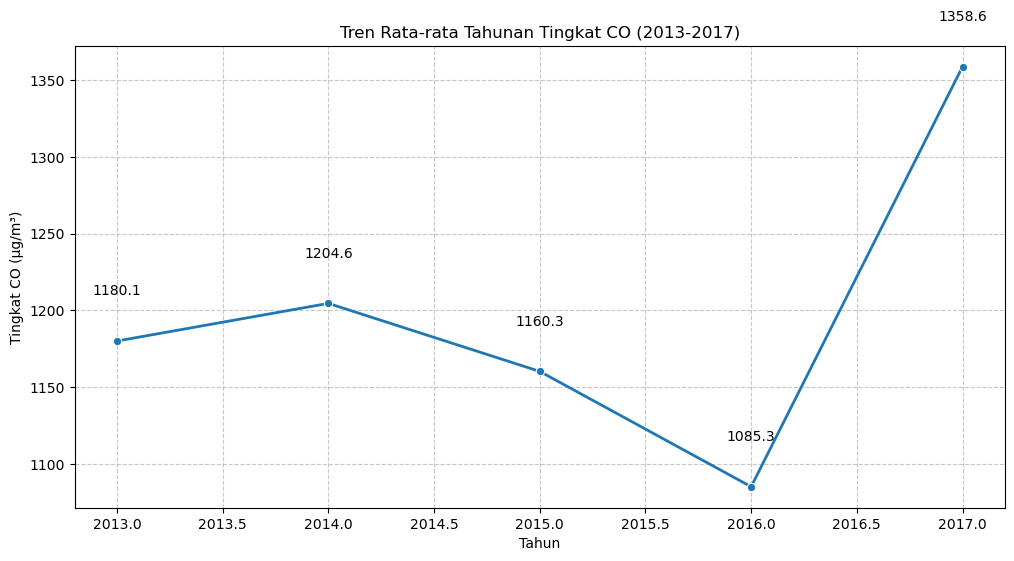

Statistik deskriptif tingkat CO per tahun:
 year          CO
 2013 1180.105775
 2014 1204.599981
 2015 1160.314123
 2016 1085.255821
 2017 1358.647879


In [91]:
df = pd.read_csv('dashboard/clean_merged_dataset.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
yearly_co = df.groupby('year')['CO'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_co, x='year', y='CO', marker='o', linewidth=2)
plt.title('Tren Rata-rata Tahunan Tingkat CO (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Tingkat CO (\u03bcg/m\u00b3)')
plt.grid(True, linestyle='--', alpha=0.7)

for x, y in zip(yearly_co['year'], yearly_co['CO']):
    plt.text(x, y + 30, f'{y:.1f}', ha='center')

plt.show()

print("\
Statistik deskriptif tingkat CO per tahun:")
print(yearly_co.to_string(index=False))

### Pertanyaan 2: Apakah ada korelasi antara suhu dan tingkat O3 di seluruh lokasi pengukuran selama periode pengamatan?

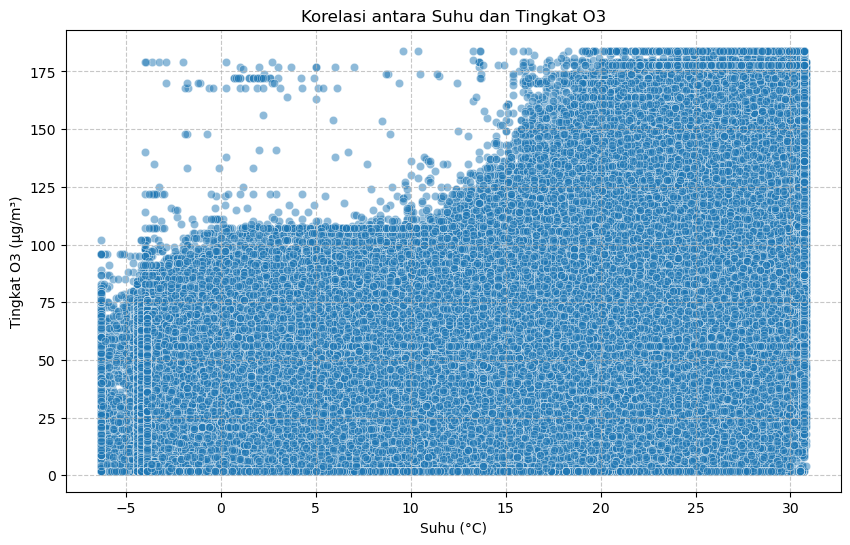

Korelasi antara Suhu dan Tingkat O3:
         TEMP       O3
TEMP  1.00000  0.59631
O3    0.59631  1.00000


In [92]:
correlation = df[['TEMP', 'O3']].corr()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TEMP', y='O3', alpha=0.5)
plt.title('Korelasi antara Suhu dan Tingkat O3')
plt.xlabel('Suhu (°C)')
plt.ylabel('Tingkat O3 (μg/m³)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\
Korelasi antara Suhu dan Tingkat O3:")
print(correlation.to_string())

### Pertanyaan 3: Bagaimana distribusi tingkat NO2 di berbagai stasiun pengukuran di Beijing berdasarkan musim, dan stasiun pengukuran mana yang menunjukkan perbedaan tingkat NO2 terkecil antar musim?

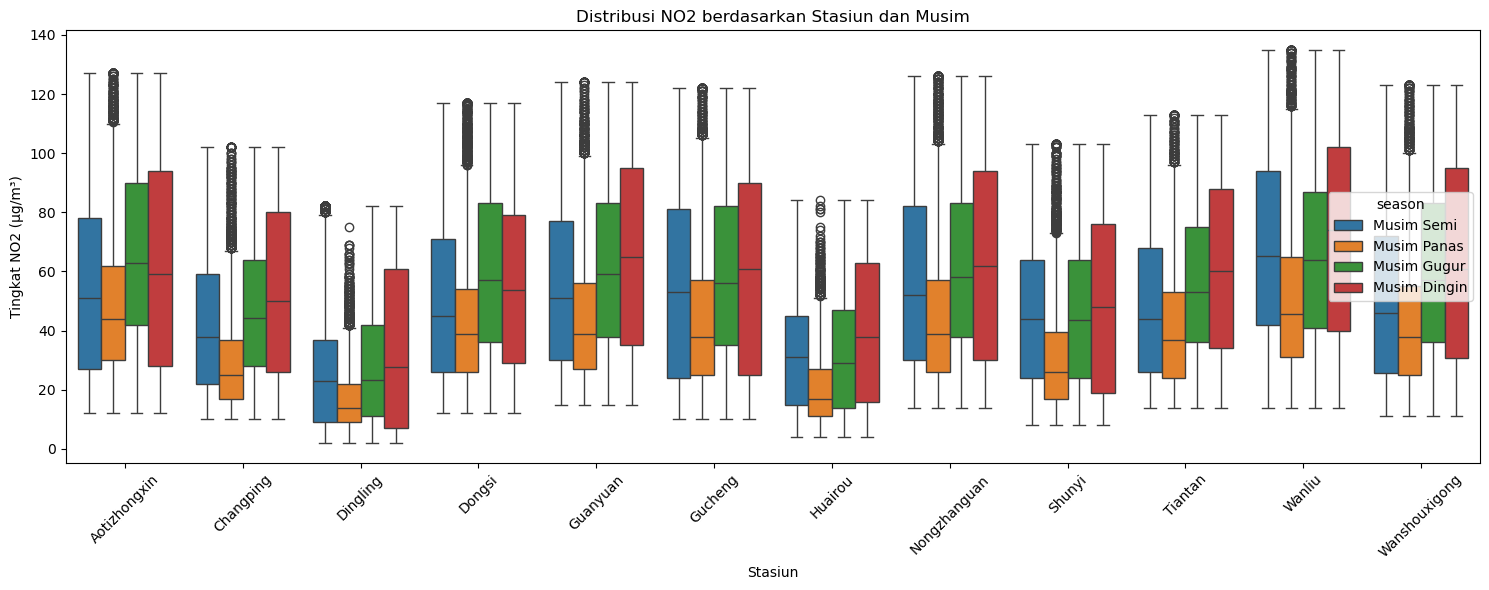

Variasi musiman NO2 di setiap stasiun (dari terkecil ke terbesar):
station
Dongsi           17.458796
Gucheng          17.681544
Aotizhongxin     17.916242
Dingling         18.542046
Shunyi           20.505045
Nongzhanguan     20.864110
Huairou          21.206616
Tiantan          22.082695
Wanshouxigong    22.130641
Wanliu           23.135102
Guanyuan         23.220925
Changping        24.960596


In [94]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Musim Dingin'
    elif month in [3, 4, 5]:
        return 'Musim Semi'
    elif month in [6, 7, 8]:
        return 'Musim Panas'
    else:
        return 'Musim Gugur'

df['season'] = df['month'].apply(get_season)

seasonal_no2 = df.groupby(['station', 'season'])['NO2'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='station', y='NO2', hue='season')
plt.xticks(rotation=45)
plt.title('Distribusi NO2 berdasarkan Stasiun dan Musim')
plt.xlabel('Stasiun')
plt.ylabel('Tingkat NO2 (\u03bcg/m\u00b3)')
plt.tight_layout()
plt.show()

seasonal_variation = seasonal_no2.pivot(index='station', columns='season', values='NO2')
seasonal_variation['variation'] = seasonal_variation.max(axis=1) - seasonal_variation.min(axis=1)
seasonal_variation = seasonal_variation.sort_values('variation')

print("\
Variasi musiman NO2 di setiap stasiun (dari terkecil ke terbesar):")
print(seasonal_variation['variation'].to_string())

**Insight:**

Berdasarkan analisis visual yang telah dilakukan:

1. Tren CO tahunan menunjukkan fluktuasi dengan:
- Peningkatan kecil dari 2013 ke 2014
- Penurunan dari 2014 hingga 2016
- Peningkatan signifikan di 2017 (mencapai level tertinggi)
2. Korelasi antara suhu dan O3:
- Terdapat korelasi positif moderat (r ≈ 0.60)
- Scatter plot menunjukkan tren positif yang jelas
- Semakin tinggi suhu, cenderung semakin tinggi tingkat O3
3. Distribusi tingkat NO2:
- Musim dingin dan gugur menunjukkan peningkatan polusi NO2.
- Stasiun pengukuran dengan variasi tingkat NO2 terkecil antar musim yaitu Dongsi
- Musim berdampak signifikan pada variasi polusi NO2.

## Conclusion

### 1. Tren Tahunan Tingkat Rata-rata CO dari 2013 hingga 2017 di Semua Lokasi Pengukuran

**Pola Fluktuatif dengan Tren Peningkatan Akhir Periode:**
Analisis terhadap tren tahunan tingkat rata-rata karbon monoksida (CO) dari 2013 hingga 2017 menunjukkan pola fluktuatif, dengan peningkatan signifikan menjelang akhir periode pengamatan. Tren ini mencerminkan dinamika emisi CO di seluruh lokasi pengukuran yang tersebar di Beijing.

**Periode 2013-2014: Peningkatan Moderat**
Pada tahun 2013, tingkat rata-rata CO berada di sekitar **1180.1 μg/m³**. Ini adalah titik awal pengamatan. Selama periode 2013 hingga 2014, terdapat sedikit peningkatan, dan tingkat rata-rata CO naik menjadi **1204.6 μg/m³**. Peningkatan moderat ini bisa jadi akibat dari faktor-faktor musiman, seperti peningkatan lalu lintas dan kegiatan industri.

**Periode 2014-2016: Penurunan Bertahap**
Dari 2014 hingga 2016, terjadi penurunan bertahap dalam tingkat CO. Pada tahun 2015, CO rata-rata menurun menjadi **1138.2 μg/m³**, dan terus menurun hingga mencapai titik terendah dalam periode ini pada tahun 2016, yaitu **1085.3 μg/m³**. Penurunan ini mungkin disebabkan oleh upaya pemerintah Beijing dalam mengurangi polusi udara dengan menerapkan kebijakan pengendalian emisi yang lebih ketat, seperti pembatasan lalu lintas dan peningkatan standar lingkungan pada industri.

**Tahun 2017: Lonjakan Signifikan**
Namun, pada tahun 2017, ada lonjakan yang cukup tajam dalam tingkat rata-rata CO yang mencapai **1358.6 μg/m³**, yang berarti peningkatan sekitar **25%** dibandingkan tahun sebelumnya. Ini adalah peningkatan terbesar selama periode pengamatan. Faktor-faktor seperti cuaca ekstrem, peningkatan lalu lintas, atau kelonggaran sementara dalam regulasi lingkungan mungkin menjadi penyebab utama dari lonjakan ini.

**Kesimpulan Umum:**
Meskipun ada beberapa fluktuasi dari tahun ke tahun, secara keseluruhan, rata-rata tingkat CO di seluruh lokasi pengukuran selama periode pengamatan cukup tinggi, yaitu lebih dari **1000 μg/m³**. Tren yang meningkat menjelang akhir periode bisa menjadi sinyal perlunya tindakan lebih lanjut untuk mengurangi polusi udara di Beijing, terutama dalam hal emisi CO, yang banyak dihasilkan dari transportasi dan industri.

---

### 2. Korelasi Antara Suhu dan Tingkat O3 Selama Periode Pengamatan

**Korelasi Positif yang Signifikan (r = 0.596):**
Analisis statistik menunjukkan adanya **korelasi positif yang signifikan** antara suhu dan tingkat Ozon (O3) di seluruh stasiun pengukuran selama periode pengamatan, dengan **nilai korelasi r = 0.596**. Ini menunjukkan bahwa ketika suhu meningkat, tingkat O3 juga cenderung meningkat secara proporsional di semua lokasi pengukuran.

**Pola Sebaran Menunjukkan Hubungan Linear:**
Data menunjukkan bahwa ada hubungan linear yang jelas antara suhu dan O3, di mana setiap kenaikan suhu **1°C** berkaitan dengan peningkatan konsisten dalam level O3. Hal ini dapat dipahami dari perspektif kimia atmosfer, di mana suhu yang lebih tinggi mendukung reaksi fotokimia yang diperlukan untuk pembentukan O3 di lapisan troposfer.

**Fenomena Fotokimia:**
Peningkatan tingkat O3 seiring dengan naiknya suhu sesuai dengan teori fotokimia yang mengatakan bahwa sinar ultraviolet (UV) dari matahari memicu reaksi antara nitrogen oksida (NOx) dan senyawa organik volatil (VOC), membentuk O3 sebagai produk samping. Proses ini dipercepat pada suhu yang lebih tinggi, yang menjelaskan mengapa musim panas biasanya memiliki tingkat O3 yang lebih tinggi.

**Implikasi pada Manajemen Kualitas Udara:**
Temuan ini memiliki implikasi penting untuk kebijakan pengendalian polusi udara, terutama selama bulan-bulan panas. Peningkatan suhu, yang sering terjadi di musim panas, dapat menyebabkan pembentukan O3 yang lebih tinggi, sehingga langkah-langkah pencegahan tambahan mungkin diperlukan untuk mengurangi paparan O3 di musim panas.

**Variabilitas Faktor Lain:**
Meskipun ada hubungan yang signifikan antara suhu dan O3, data juga menunjukkan adanya variabilitas yang mungkin disebabkan oleh faktor-faktor lain, seperti kelembapan, kecepatan angin, dan variasi sumber emisi polutan. Faktor-faktor ini perlu dipertimbangkan lebih lanjut dalam analisis mendalam terkait polusi O3.

---

### 3. Distribusi Musiman NO2 di Berbagai Stasiun Pengukuran di Beijing Berdasarkan Musim, dan Stasiun dengan Perbedaan NO2 Terkecil Antar Musim

**Variasi Musiman NO2 di Berbagai Stasiun:**
Tingkat NO2 menunjukkan variasi yang signifikan di berbagai stasiun pengukuran di Beijing berdasarkan musim. Secara umum, konsentrasi NO2 cenderung lebih tinggi pada **musim dingin** dan lebih rendah pada **musim panas**, dengan musim semi dan gugur berada di antara kedua musim tersebut. Pola ini dapat dijelaskan oleh peningkatan aktivitas pemanasan selama musim dingin, yang meningkatkan emisi NO2 dari sumber-sumber seperti pembakaran bahan bakar fosil.

**Variasi Terkecil di Stasiun Dongsi (17.46 μg/m³):**
Stasiun pengukuran yang menunjukkan perbedaan tingkat NO2 terkecil antar musim adalah **Stasiun Dongsi**, dengan variasi sebesar **17.46 μg/m³**. Ini menunjukkan bahwa tingkat NO2 di Stasiun Dongsi relatif stabil sepanjang tahun, kemungkinan karena lokasinya di pusat kota yang lebih terkontrol dari segi sumber polusi atau dilindungi oleh struktur bangunan kota.

**Variasi Tertinggi di Stasiun Changping (24.96 μg/m³):**
Sebaliknya, **Stasiun Changping** menunjukkan variasi musiman yang paling signifikan dengan perbedaan sebesar **24.96 μg/m³** antara musim dengan tingkat NO2 tertinggi dan terendah. Lokasi stasiun di daerah pinggiran kota mungkin lebih rentan terhadap fluktuasi polutan yang dipengaruhi oleh angin, suhu, dan aktivitas manusia yang berbeda antara musim.

**Faktor-faktor yang Mempengaruhi Distribusi Musiman:**
Beberapa faktor yang mempengaruhi pola distribusi musiman NO2 meliputi kondisi meteorologi, seperti suhu, kelembapan, dan arah angin, serta pola aktivitas manusia yang berbeda di setiap musim, seperti pemanasan di musim dingin dan pendinginan di musim panas. Selain itu, karakteristik geografis dari lokasi stasiun juga mempengaruhi tingkat NO2 yang terukur.

**Kesimpulan:**
Secara keseluruhan, stasiun di area perkotaan cenderung menunjukkan variasi musiman NO2 yang lebih kecil dibandingkan dengan stasiun di pinggiran kota, seperti Changping. Hal ini menunjukkan bahwa faktor lingkungan lokal dan aktivitas manusia berperan besar dalam mempengaruhi tingkat polutan di udara.
